In [111]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import random

# Survivability (dying in 1 turn or not) of a baseline fighter based on their position from enemy end of turn.
Hypothesis, as per general community knowlege regarding system, when the enemy is dangerous, ensuring they only gets two attacks instead of 3 is high value (step or stride).

In [112]:
# helper functions to get stat given lvl
def getMaxingConSecond(lvl):
    if (lvl<5):
        return 3
    elif(lvl<15):
        return 4
    else:
        return 5
    
def fighterArmorProfBonus(lvl):
    # trained
    if(lvl<11):
        return 2 + lvl
    # expert
    elif(lvl<17):
        return 4 + lvl
    else:
        return 6 + lvl
    
# https://2e.aonprd.com/Equipment.aspx?ID=2785
def scalingPlate(lvl):
    AC = 10 + 6 + fighterArmorProfBonus(lvl)
    if(lvl<5):
        return AC
    elif(lvl<11):
        return AC +1
    elif(lvl<18):
        return AC + 2
    else:
        return AC + 3

In [113]:
# Checks for crit, use return type as a multiplier
def strikeHit(targetAC, hitResult):
    # regular hit
    if(hitResult>=targetAC+10):
        return 2
    elif(hitResult>=targetAC):
        return 1
    else:
        return 0

In [114]:
# A generic fighter's defenses scaling with lvl
class Valeros:
    def __init__(self,lvl):
        self.actions = 3
        self.reactions = 1
        self.conMod = getMaxingConSecond(lvl)
        self.hpMax = 8 + lvl * (10 + self.conMod)
        self.hp = self.hpMax
        self.AC = scalingPlate(lvl)
    
    def regainActions():
        self.actions = 3
        self.reactions = 1

    def TurnStart():
        self.regainActions()

    def CheckHit(self,attackRoll):
        return strikeHit(self.AC,attackRoll)
    
    def TakesDamage(self,damage):
        self.hp -= damage

In [115]:
testFighter = Valeros(5)

print(testFighter.hpMax)
print(testFighter.AC)

78
24


In [116]:
#https://2e.aonprd.com/Rules.aspx?ID=2874
strikeAttackBonus_Extreme = {
-1 :	10,
0 :	10,
1 :	11,
2 :	13,
3 :	14,
4 :	16,
5 :	17,
6 :	19,
7 :	20,
8 :	22,
9 :	23,
10 :	25,
11 :	27,
12 :	28,
13 :	29,
14 :	31,
15 :	32,
16 :	34,
17 :	35,
18 :	37,
19 :	38,
20 :	40,
21 :	41,
22 :	43,
23 :	44,
24 :	46
}

def extremeStrikeAttackBonus(lvl):
    useLvl = np.clip(lvl,-1,24)
    return strikeAttackBonus_Extreme[useLvl]
 


In [117]:
def d20():
    return random.randrange(1,21)

def diceRoll(sides):
    return random.randrange(1, sides+1)

In [118]:
strikeDamage_Extreme = {
    -1 : lambda: diceRoll(6) + 1,
    0 : lambda:  diceRoll(6) + 3,
    1 : lambda:  diceRoll(8) + 4,
    2 : lambda:  diceRoll(12) + 4,
    3 : lambda:  diceRoll(12) + 8,
    4 : lambda:  2*diceRoll(10) + 7,
    5 : lambda:  2*diceRoll(12) + 7,
    6 : lambda:  2*diceRoll(12) + 10,
    7 : lambda:  2*diceRoll(12) + 12,
    8 : lambda:  2*diceRoll(12) + 15,
    9 : lambda:  2*diceRoll(12) + 17,
    10 : lambda:  2*diceRoll(12) + 20,
    11 : lambda:  2*diceRoll(12) + 22,
    12 : lambda:  3*diceRoll(12) + 19,
    13 : lambda:  3*diceRoll(12) + 21,
    14 : lambda:  3*diceRoll(12) + 24,
    15 : lambda:  3*diceRoll(12) + 26,
    16 : lambda:  3*diceRoll(12) + 29,
    17 : lambda:  3*diceRoll(12) + 31,
    18 : lambda:  3*diceRoll(12) + 34,
    19 : lambda:  4*diceRoll(12) + 29,
    20 : lambda:  4*diceRoll(12) + 32,
    21 : lambda:  4*diceRoll(12) + 34,
    22 : lambda:  4*diceRoll(12) + 37,
    23 : lambda:  4*diceRoll(12) + 39,
    24 : lambda:  4*diceRoll(12) + 42,
}

def extremeStrikeDamage(lvl):
    useLvl = np.clip(lvl,-1,24)
    return strikeDamage_Extreme[useLvl]()

In [119]:
extremeStrikeDamage(15)

56

## Sim 1 :: Fighter ends turn such that extreme threat enemy melee enemy 4x lvls above fighter can only make one attack

In [120]:
samples_died = []

trials = 100000
for lvl in range(1,21):
    died = 0
    for i in range(1,trials):
        testPC = Valeros(lvl)

        # get hit result
        hitResult = d20() + extremeStrikeAttackBonus(lvl+4)
        didItHit = testPC.CheckHit(hitResult)
        if(didItHit):
            testPC.TakesDamage(didItHit*extremeStrikeDamage(lvl+4))


        died += testPC.hp<=0
    
    # get likelihood
    samples_died.append(died/trials)



[0.66126, 0.41683, 0.29039, 0.2299, 0.08463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


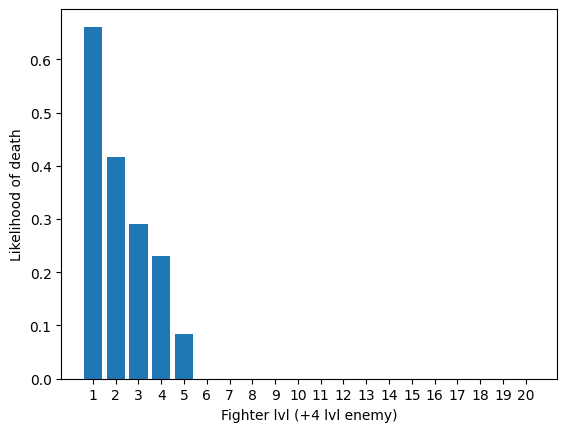

In [121]:
plt.xticks(range(1,21))
plt.xlabel("Fighter lvl (+4 lvl enemy)")
plt.ylabel("Likelihood of death")
plt.bar(range(1,21),samples_died)

print(samples_died)

## Sim 2 :: Fighter ends turn such that extreme threat melee enemy can make 2x attacks

In [122]:
samples_died = []

trials = 100000
for lvl in range(1,21):
    died = 0
    for i in range(1,trials):
        testPC = Valeros(lvl)

        # get hit result
        map = [0,5]
        for curMap in map:
            hitResult = d20() + extremeStrikeAttackBonus(lvl+4) - curMap
            didItHit = testPC.CheckHit(hitResult)
            if(didItHit):
                testPC.TakesDamage(didItHit*extremeStrikeDamage(lvl+4))


        died += testPC.hp<=0
    
    # get likelihood
    samples_died.append(died/trials)

[0.88165, 0.82626, 0.71731, 0.68142, 0.43577, 0.43942, 0.42144, 0.38071, 0.31444, 0.32386, 0.16029, 0.16973, 0.13065, 0.14173, 0.08048, 0.09938, 0.05182, 0.0415, 0.03242, 0.03991]


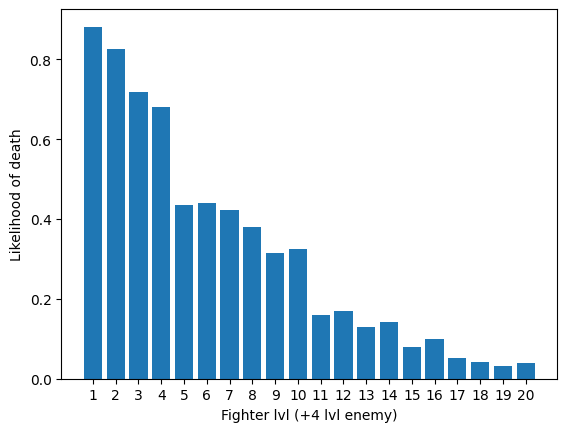

In [123]:
plt.xticks(range(1,21))
plt.xlabel("Fighter lvl (+4 lvl enemy)")
plt.ylabel("Likelihood of death")
plt.bar(range(1,21),samples_died)

print(samples_died)

Sim 3 :: Fighter ends turn within reach of extreme threat melee enemy, 3x attacks incoming (Map applies)

In [124]:
samples_died = []

trials = 100000
for lvl in range(1,21):
    died = 0
    for i in range(1,trials):
        testPC = Valeros(lvl)

        # get hit result
        map = [0,5,10]
        for curMap in map:
            hitResult = d20() + extremeStrikeAttackBonus(lvl+4) - curMap
            didItHit = testPC.CheckHit(hitResult)
            if(didItHit):
                testPC.TakesDamage(didItHit*extremeStrikeDamage(lvl+4))


        died += testPC.hp<=0
    
    # get likelihood
    samples_died.append(died/trials)

[0.92864, 0.90797, 0.82953, 0.82487, 0.6233, 0.65206, 0.65895, 0.61308, 0.54993, 0.59644, 0.30705, 0.36786, 0.3254, 0.38619, 0.26989, 0.34024, 0.17495, 0.16362, 0.14076, 0.19596]


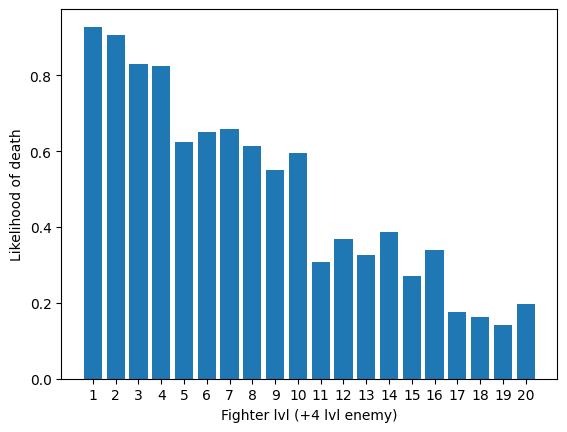

In [125]:
plt.xticks(range(1,21))
plt.xlabel("Fighter lvl (+4 lvl enemy)")
plt.ylabel("Likelihood of death")
plt.bar(range(1,21),samples_died)

print(samples_died)

# Experimental results

Besides mitigating attacks by not ending turn next to enemy, AC increase has an enormous impact on likelihood of death when number attacks  (Runes increase at 5 and 11 correspond to massive drop in likelihood of death for the fighter).

However, this discrepancy drops when monster can make 3 attacks. Presumably because the monster needs to crit when it's making less attacks to eliminate the fighter, whereaeas with 3 attacks there's more likeli regular hits to chip fighter down.